In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [17]:
np.random.seed(0)
head_count_array = np.random.binomial(50000, 0.7, 100000)
frequency_array =  head_count_array / 50000

In [ ]:
def frequency_heads(coin_flip_sequence):
    """计算硬币正面朝上的概率"""
    # 统计正面朝上的次数
    total_heads = sum(coin_flip_sequence)
    # total_heads = len([head for head in coin_flip_sequence if head == 1])
    return total_heads / len(coin_flip_sequence)

coin_flips = [np.random.randint(0, 2) for _ in range(10)]
freq_heads = frequency_heads(coin_flips)
print(f"Frequency of Heads is {freq_heads}")

In [ ]:
coin_flips = []
frequencies = []
for _ in range(1000):
    coin_flips.append(np.random.randint(0, 2))
    frequencies.append(frequency_heads(coin_flips))

plt.plot(list(range(1000)), frequencies)
plt.axhline(0.5, color='black')
plt.xlabel("Number of Coin Flips")
plt.ylabel("Head-Frequency")
plt.show()

In [ ]:
for i in range(1, 6):
    # 此处np操作直接返回scalar，是二项分布为1的数量
    head_count = np.random.binomial(1000, 0.7)
    frequency = head_count / 1000
    print(f"Frequency at iteration{i} is {frequency}")


In [ ]:
frequency_counts = defaultdict(int)
for frequency in frequency_array:
    frequency_counts[frequency] += 1

frequencies = list(frequency_counts.keys())
counts = [frequency_counts[freq] for freq in frequencies]

plt.scatter(frequencies, counts)
plt.xlabel("Frequency")
plt.ylabel("Count")
plt.show()

In [ ]:
plt.hist(frequency_array, bins='auto', edgecolor='black')
plt.xlabel("Binned Frequency")
plt.ylabel("Count")
plt.show()

In [ ]:
counts, bin_edges, _ = plt.hist(frequency_array, bins='auto', edgecolor='black')

def output_bin_coverage(i):
    if(i > len(bin_edges) - 1):
        raise RuntimeError("The value is too big!")
    count = int(counts[i])
    range_start, range_end = bin_edges[i], bin_edges[i+1]
    range_string = f"{range_start: .3f} - {range_end: .3f}"
    print(f"The bin for frequency range {range_string} contains",
          f"{count} element{'' if count == 1 else 's'}")

output_bin_coverage(0)
output_bin_coverage(5)

In [ ]:
likelihoods, bin_edges, _ = plt.hist(frequency_array, bins='auto', edgecolor='black', density=True)
bin_width = bin_edges[1] - bin_edges[0]
plt.xlabel("Binned Frequency")
plt.ylabel("Relative Likelihood")
plt.show()

In [ ]:
peak_index = likelihoods.argmax()
start_index, end_index = peak_index - 1, peak_index + 2
area = likelihoods[start_index: end_index + 1].sum() * bin_width
range_start, range_end = bin_edges[start_index], bin_edges[end_index]
range_string = f"{range_start: .3f} - {range_end: .3f}"
print(f"Sampled frequency falls within interval {range_string} with probability {area: .3f}")


In [ ]:
def compute_high_confidence_interval(likelihoods, bin_width):
    peak_index = likelihoods.argmax()
    area = likelihoods[peak_index] * bin_width
    start_index, end_index = peak_index, peak_index + 1
    while area < 0.95:
        if start_index > 0:
            start_index -= 1
        if end_index < likelihoods.size - 1:
            end_index += 1 
        area = likelihoods[start_index: end_index + 1].sum() * bin_width

    range_start, range_end = bin_edges[start_index], bin_edges[end_index]
    range_string = f"{range_start: .6f} - {range_end: .6f}"
    print(f"The frequency range {range_string} represents a ",
          f"{100 * area: .2f}% confidence interval")
    return start_index, end_index

compute_high_confidence_interval(likelihoods, bin_width)
    

The frequency range  0.695769 -  0.703708 represents a   95.06% confidence interval


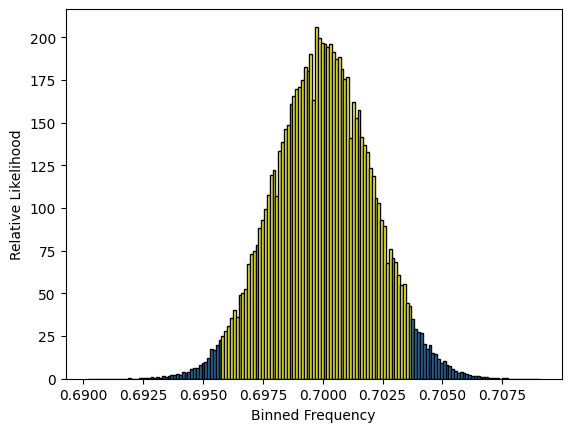

In [18]:
likelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto', edgecolor='black', density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)
for i in range(start_index, end_index):
    patches[i].set_facecolor('yellow')
plt.xlabel("Binned Frequency")
plt.ylabel("Relative Likelihood")
plt.show()

In [19]:
likelihoods, bin_edges = np.histogram(frequency_array, bins='auto', density=True)
bin_width = bin_edges[1] - bin_edges[0]
compute_high_confidence_interval(likelihoods, bin_width)

The frequency range  0.695769 -  0.703708 represents a   95.06% confidence interval


(np.int64(47), np.int64(114))